In [1]:
#importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, decomposition



In [2]:
# importing dataset as dataframe named table
# peeking at the first 5 rows
table = pd.read_csv('online_shoppers_intention.csv')
table.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [3]:
# taking a look at data dims, shape, size, types, column names and overall info

print('Dimensions: ',table.ndim)
print('Shape: ',table.shape)
print('Size: ', table.size)
print('Data Type: ', table.dtypes)
print('Columns: ', table.columns)
print('Info: ', table.info)

Dimensions:  2
Shape:  (12330, 18)
Size:  221940
Data Type:  Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object
Columns:  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Vi

In [4]:
# worth noting, there are 12,330 rows and 18 columns
# some data types may need to be changed
# checking nulls in data

table.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [5]:
# viewing descriptive statistics for all columns of dataset

table.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12202.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12195.000000,12330.000000,12207.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503770,34.472398,31.731468,1194.746220,0.022191,0.043073,5.911196,0.061427,2.123618,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270882,140.749294,44.475503,1913.669288,0.048488,0.048597,18.632116,0.198917,0.911829,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# The null value for the data are within the parameters Informational, PageValues and Operating systems. 
# While there aren't many overall nulls compared to the amount of data, they can easily be filled
# for Informational and Page Values, at least 75% of the data is 0, which is the mode and median
# Operating system should be an integer, so we'll go with median as well


table['Informational']=table['Informational'].fillna(table['Informational'].median())

table['PageValues']=table['PageValues'].fillna(table['PageValues'].median())

table['OperatingSystems']=table['OperatingSystems'].fillna(table['OperatingSystems'].median())

table.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
table.dtypes

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [8]:
# for now, Informational should change to an integer data type

table['Informational']=table['Informational'].astype('int64')


table.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [9]:
# trying to see some boxplots of distributions to see if any outliers
# first, create a new table of just the attributes

table_att = table.iloc[:,0:6]

table_att.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000


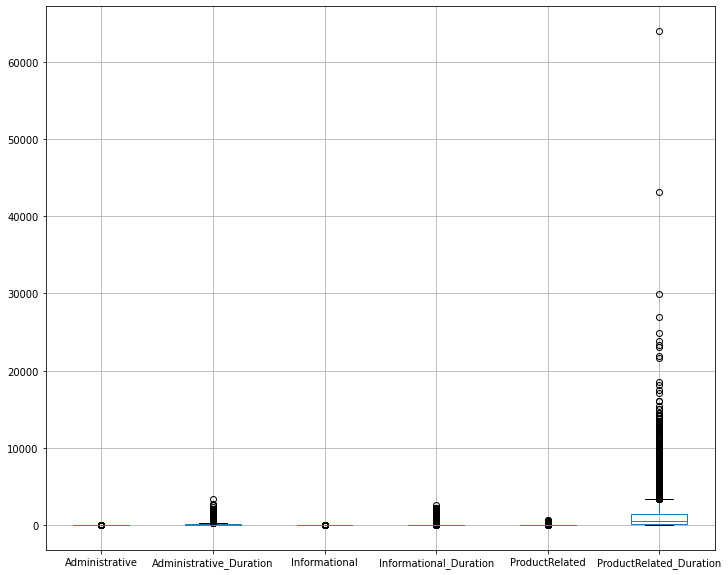

In [10]:
# viewing boxplot of these attributes

fig = plt.figure(figsize = (12,10))
table_att.boxplot()
plt.show()

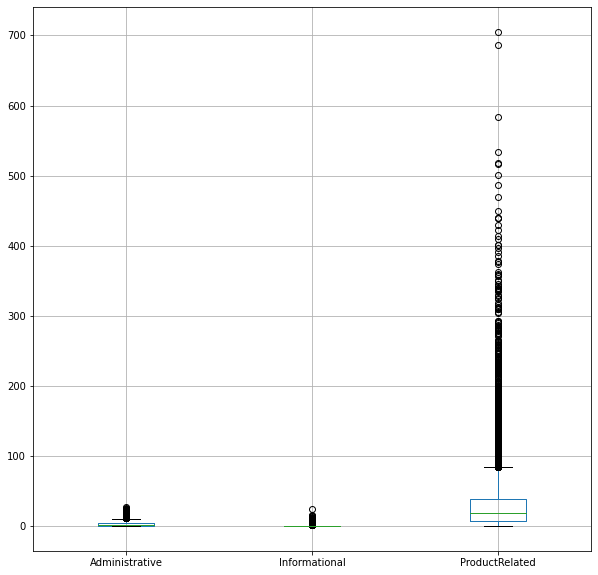

In [11]:
# it's obvious there is a heavy positive skew for most of these variables. 
# Let's get a closer look at page visits for each to confirm for those as they're small on previous plot

table_att_pv = table_att[['Administrative','Informational','ProductRelated']]
fig = plt.figure(figsize = (10,10))
table_att_pv.boxplot()
plt.show()


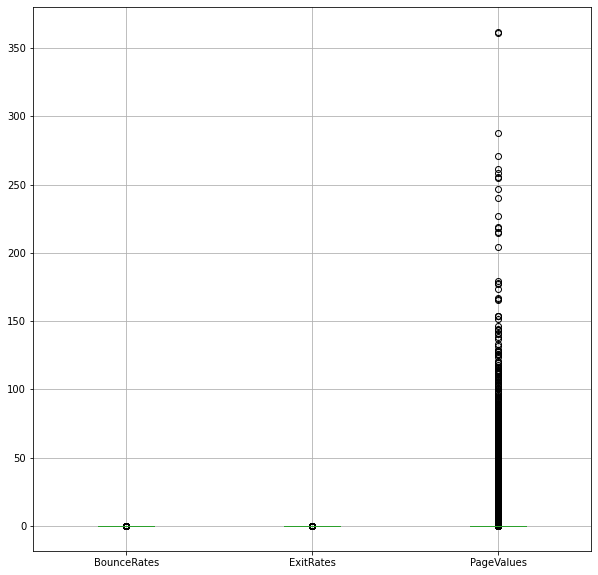

In [12]:
# Doing the same for metrics - Bounce rate, exit rate and page value

table_met = table.iloc[:,6:9]
fig = plt.figure(figsize = (10,10))
table_met.boxplot()
plt.show()


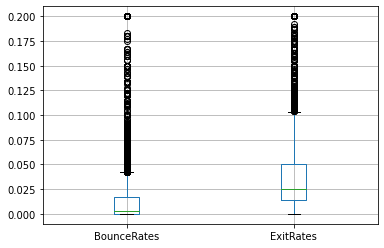

In [13]:
#closer look at just bounce and exit rates

table_met = table_met.iloc[:,:2]
table_met.boxplot()
plt.show()

In [14]:
# check correlation for all numeric variables

corr_num = table.iloc[:,:6].corr() # correlation of numerical variables
corr_num

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
Administrative,1.000000,0.601583,0.371476,0.255848,0.431119,0.373939
Administrative_Duration,0.601583,1.000000,0.300472,0.238031,0.289087,0.355422
Informational,0.371476,0.300472,1.000000,0.617271,0.370656,0.384271
Informational_Duration,0.255848,0.238031,0.617271,1.000000,0.280046,0.347364
ProductRelated,0.431119,0.289087,0.370656,0.280046,1.000000,0.860927
ProductRelated_Duration,0.373939,0.355422,0.384271,0.347364,0.860927,1.000000


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


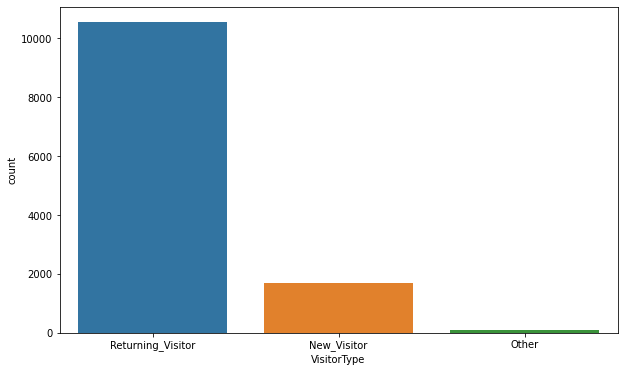

In [15]:
fig=plt.figure(figsize=(10,6))

sns.countplot(table['VisitorType'],data=table)
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


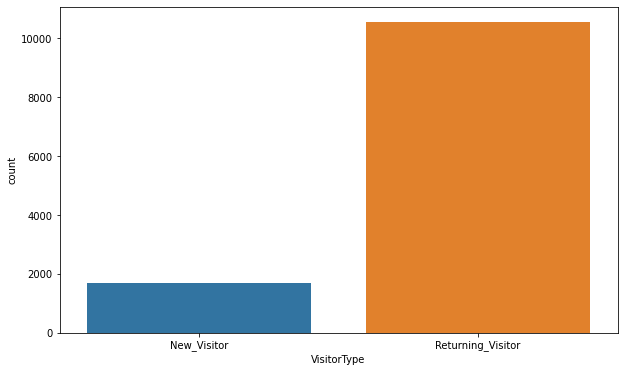

(12245, 18)


In [16]:
# getting rid of "other" visitor type

table = table.loc[table['VisitorType']!="Other"]

table['VisitorType']=table['VisitorType'].astype('category')
fig=plt.figure(figsize=(10,6))

sns.countplot(table['VisitorType'],data=table)
plt.show()

print(table.shape)

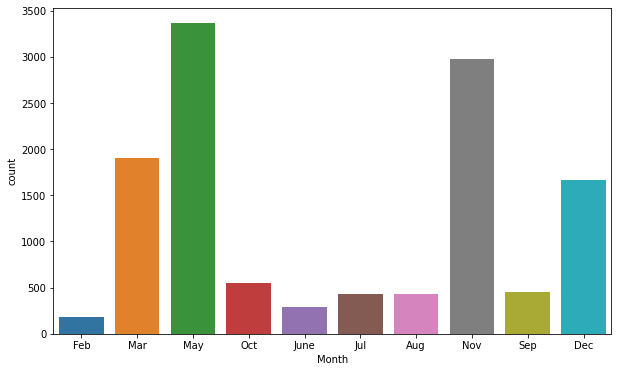

In [17]:
fig=plt.figure(figsize=(10,6))
sns.countplot(table['Month'],data=table)
plt.show()

There are only positive correlations, but, other than duration for a page to its own page visits, moderate correlations at best exist. Because of low correlations,it could be good to model based off these variables as there will be low inflation and multicollinearity concerns.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


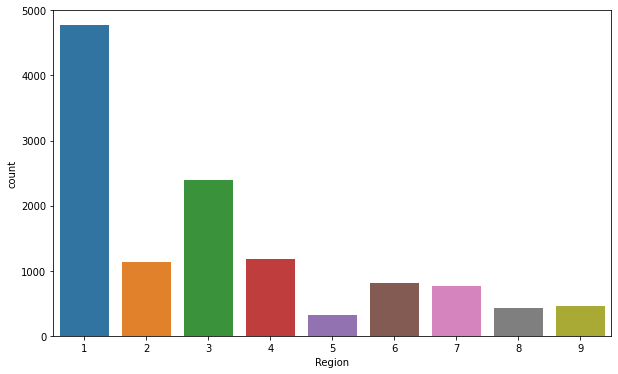

In [18]:
fig=plt.figure(figsize=(10,6))

sns.countplot(table['Region'],data=table)
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


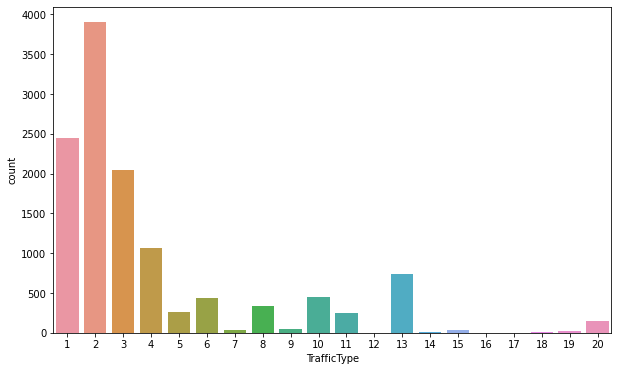

In [19]:
fig=plt.figure(figsize=(10,6))

sns.countplot(table['TrafficType'],data=table)
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


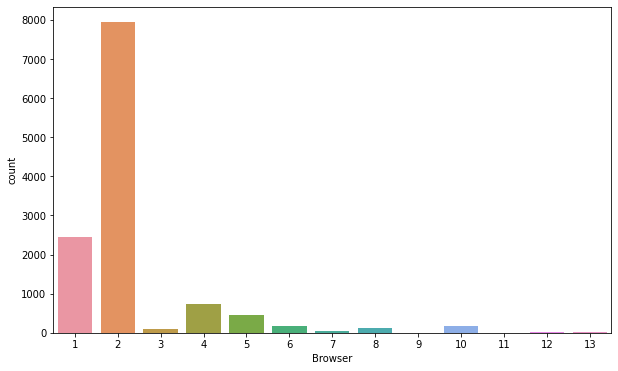

In [20]:
fig=plt.figure(figsize=(10,6))

sns.countplot(table['Browser'],data=table)
plt.show()

In [21]:


# Noisy data in Browser (Browsers of 7 and greater) and TrafficType (Type 14 and greater)

table = table.loc[(table['Browser']<=6)&(table['TrafficType']<=13)]
table = table.loc[table['VisitorType']!="Other"]


# now finally change their data types to categorical

table[['Browser','Region','TrafficType']]=table[['Browser','Region','TrafficType']].astype('category')

In [22]:
table.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                        object
OperatingSystems            float64
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object

In [23]:
# creating a column to create a boolean for visitor type

table["Returning Visitor?"]=np.where(table['VisitorType'].str.contains("Returning_Visitor"),1,0)

table["Returning Visitor?"] = table["Returning Visitor?"].astype(bool)

table["Returning Visitor?"].unique()

array([ True, False])

In [24]:
# transform revenue, weekend and returning visitor to 1s and 0s

table["Weekend"] = (table["Weekend"]==True).astype(int)

table["Returning Visitor?"] = (table["Returning Visitor?"]==True).astype(int)

table["Revenue"] = (table["Revenue"]==True).astype(int)

In [25]:
# creating new table for variables wanted to be used for random forest

table_rf = table[['Region','TrafficType','Returning Visitor?','Weekend','Revenue']]

table_rf.head()

,Region,TrafficType,Returning Visitor?,Weekend,Revenue
0,1,1,1,0,0
1,1,2,1,0,0
2,9,3,1,0,0
3,2,4,1,0,0
4,1,4,1,1,0


<AxesSubplot:>

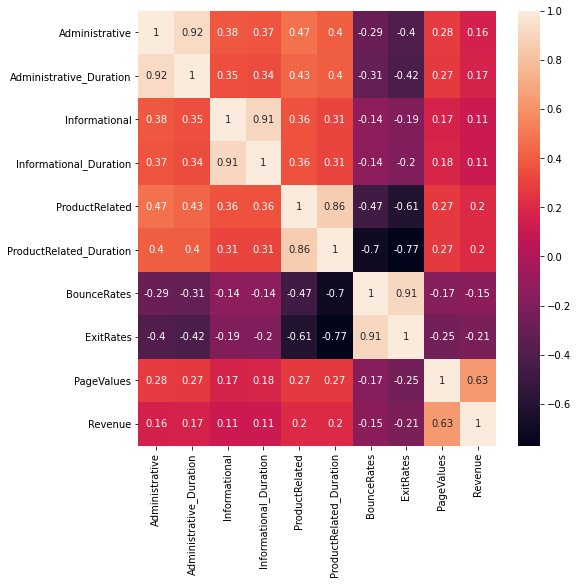

In [26]:
# Creating new table with logged values

table_log = np.log((table.iloc[:,:9])+1)

# adding revenue column to log table

table_log['Revenue'] = table['Revenue']

corr_num_log = table_log.corr()

fig = plt.figure(figsize=(8,8))
sns.heatmap(round(corr_num_log,2),xticklabels=corr_num_log.columns,yticklabels=corr_num_log.columns, annot=True)

<AxesSubplot:>

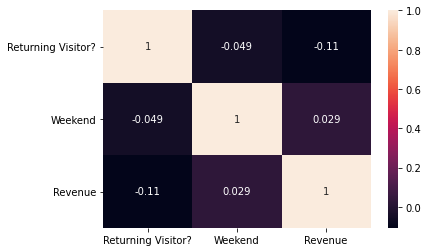

In [27]:
# check correlation between boolean 

corr_cat = table_rf.corr()
sns.heatmap(corr_cat, annot=True)


In [28]:
# Number of Sales & proportion of sales

print("Total number of sales in data:", sum(table['Revenue']))

print("Proportion of sales to overall visitors:", sum(table['Revenue'])/len(table))

Total number of sales in data: 1793
Proportion of sales to overall visitors: 0.15368132339076027


In [29]:
## Logistic Regression - using numerical variables from attributes, logged, to predict revenue

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import neighbors, preprocessing
from sklearn.linear_model import LogisticRegression
X = table_log.iloc[:,:6]
y = table.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(table_log.iloc[:,:6],table.iloc[:,17])
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X)

print('coefficients for features are', logreg.coef_)
print('Intercept of Model:', logreg.intercept_)
print('Score of Model:',logreg.score(X,y))

coefficients for features are [[-0.04667419  0.27497177  0.01011692  0.03973213  0.00256743  0.70083407]]
Intercept of Model: [-1.90573204]
Score of Model: 0.21985086140395987


These are the coefficient values for each of type of page visits - Administrative, administrative duration, informational, informational duration, product related and product related duration, respectively, with them being normalized with a Log+1 transformation to limit outliers and skew. The largest impact on if a sale is made, is product related page visit duration. However, the overall score for the model was poor.

In [30]:
logreg.predict(X)

array([0, 1, 0, ..., 1, 1, 1])

In [31]:
#classification with random forests - using categorical variables region, traffic type, vistor type and weekend

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(table_rf.iloc[:,:4],table_rf.iloc[:,4],test_size=.3)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [32]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[2916   51]
 [ 518   16]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2967
           1       0.24      0.03      0.05       534

    accuracy                           0.84      3501
   macro avg       0.54      0.51      0.48      3501
weighted avg       0.76      0.84      0.78      3501



In [33]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X_train, y_train, cv=4))


[0.84329089 0.84084231 0.84370407 0.84076433]


In [34]:
# K-means cluster
# Include all data that we've seen to have an impact on  

table_km1 = table_log.iloc[:,:6]
table_km2 = table_rf.iloc[:,:4]

table_km = table_km1.join(table_km2)
table_km.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Region,TrafficType,Returning Visitor?,Weekend
0,0.0,0.0,0.0,0.0,0.693147,0.000000,1,1,1,0
1,0.0,0.0,0.0,0.0,1.098612,4.174387,1,2,1,0
2,0.0,0.0,0.0,0.0,0.693147,0.000000,9,3,1,0
3,0.0,0.0,0.0,0.0,1.098612,1.299283,2,4,1,0
4,0.0,0.0,0.0,0.0,2.397895,6.443336,1,4,1,1


In [35]:
# importing necessary libraries for that, and using 

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

X_digits = table_km.values
y_digits = table.iloc[:,17].values
data = scale(X_digits)
n_digits = len(np.unique(y_digits))
labels=y_digits

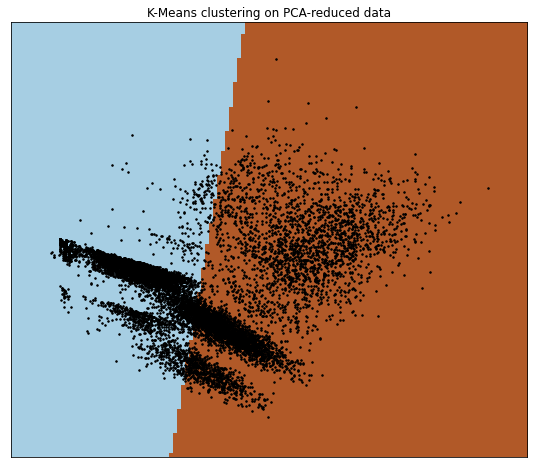

In [36]:
# applying Principal Component Analysis to reduce data to 2 dimensions

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans=KMeans(init='k-means++',n_clusters=n_digits, n_init =10)
kmeans.fit(reduced_data)

#plotting decision boundary
x_min, x_max = reduced_data[:,0].min()-1,reduced_data[:,0].max()+1
y_min, y_max = reduced_data[:,1].min()-1,reduced_data[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

# obtain labels for each point
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

# put result on color plot

Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(10,8))
plt.figure(1)
plt.clf()
plt.imshow(Z,interpolation='nearest',
            extent = (xx.min(), xx.max(), yy.min(),yy.max()),
            cmap = plt.cm.Paired, origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize=3)

plt.title('K-Means clustering on PCA-reduced data')
plt.xticks(())
plt.yticks(())
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0fd1dcd-6362-495f-bc24-80f9de1d46db' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>